In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split 
from sklearn.naive_bayes import GaussianNB, CategoricalNB , MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics 
from sklearn import preprocessing
from sklearn import datasets
from sklearn.utils import shuffle
from pathlib import Path
from sklearn.utils import Bunch
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import ShuffleSplit

In [2]:
ROOT = Path(".")

In [3]:
def load_from_csv(set_name, scale='norm'):
    df = pd.read_csv(ROOT/f'csv/{set_name}.csv')
    X = df.drop('Class',axis=1)
    y = df['Class']
    if scale == 'std':
        X = (X-X.mean())/X.std()
    elif scale == 'norm':
        X = (X-X.min())/(X.max() - X.min())
    return Bunch(data=X,target=y)

def load_glass(scale):
    return load_from_csv('glass',scale)
def load_seeds(scale):
    return load_from_csv('seeds',scale)
def load_wine(scale):
    return load_from_csv('wine',scale)

In [42]:
def knn_cv(data, knn, n_iter, stratified=True, n_splits=5):
    X = data.data
    y = data.target
    mean_f_score = [] 
    
    for _ in range(n_iter):
        if stratified:
            kf = StratifiedKFold(n_splits=n_splits,shuffle=True)
        else:
            kf = KFold(n_splits=n_splits,shuffle=True)

        for train_index, test_index in kf.split(X, y):
            X_train, X_test = X.loc[train_index], X.loc[test_index]
            y_train, y_test = y.loc[train_index], y.loc[test_index]
            
            knn.fit(X_train, y_train)
            y_pred = knn.predict(X_test)

            mean_f_score.append( metrics.f1_score(y_test, y_pred, average='macro'))
        return np.mean(mean_f_score)

def latex_df(df):
    for row in df.values:
        for v in row:
            print(round(v,2),end=' & ')
        print('\b\b',end='\\\\\n')
        
        
distance2 = lambda d : d ** 2
    
def research(dataset, k_range, metric = 'euclidean',weights='uniform',stratified_cv=True):
    result = []
    
    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k, weights=weights, metric=metric)
        score = knn_cv(dataset, knn, n_iter=1000000, n_splits=5,stratified=stratified_cv)
        result.append(score)
    
    return result

def scale_research(set_name, k_range):
    scales = ('none','norm','std')
    
    
    df = pd.DataFrame()
    plt.figure(figsize=(10,5))
    
    for scale in scales:
        dataset = load_from_csv(set_name,scale)
        score = research(dataset, k_range, metric = 'euclidean', weights='uniform')
        df[scale] = score
        plt.plot(k_range,score,label=scale)
        
    plt.legend()
    plt.grid()
    plt.show()
    
    latex_df(df)

def cv_research(dataset, k_range):
    stratified = (True, False)
    stratified_labels = {True:'Stratified CV',False:'CV'}
    
    
    df = pd.DataFrame()
    plt.figure(figsize=(10,5))
    
    for st in stratified:
        score = research(dataset, k_range, metric = 'euclidean', weights='uniform',stratified_cv=st)
        df[stratified_labels[st]] = score
        plt.plot(k_range,score,label=stratified_labels[st])
        
    plt.legend()
    plt.grid()
    plt.show()
    
    latex_df(df)
    

def metrics_research(dataset, k_range):
    metrics = ('euclidean','manhattan','chebyshev')

    df = pd.DataFrame()
    df['k'] = k_range
    plt.figure(figsize=(10,5))
    
    for metric in metrics:
        score = research(dataset, k_range, metric = metric, weights='uniform')
        df[metric] = score
        plt.plot(k_range,score,label=metric)
        
    plt.legend()
    plt.grid()
    plt.show()
    
    latex_df(df)
    
    
def weights_research(dataset, k_range):
    weights = ('uniform','distance',distance2)
    weights_labels = {'uniform':'uniform','distance':'distance',distance2:'distance^2'}
    
    df = pd.DataFrame()
    df['k'] = k_range
    plt.figure(figsize=(10,5))
    
    for weight in weights:
        score = research(dataset, k_range, metric = 'euclidean', weights=weight)
        df[weights_labels[weight]] = score
        plt.plot(k_range,score,label=weights_labels[weight])
        
    plt.legend()
    plt.grid()
    plt.show()
    
    latex_df(df)


In [5]:
wine = load_wine('norm')
glass = load_glass('norm')
seeds = load_seeds('norm')

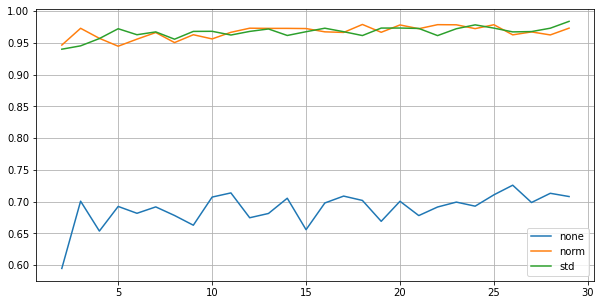

0.59 & 0.95 & 0.94 & \\
0.7 & 0.97 & 0.95 & \\
0.65 & 0.96 & 0.96 & \\
0.69 & 0.94 & 0.97 & \\
0.68 & 0.96 & 0.96 & \\
0.69 & 0.97 & 0.97 & \\
0.68 & 0.95 & 0.96 & \\
0.66 & 0.96 & 0.97 & \\
0.71 & 0.96 & 0.97 & \\
0.71 & 0.97 & 0.96 & \\
0.67 & 0.97 & 0.97 & \\
0.68 & 0.97 & 0.97 & \\
0.71 & 0.97 & 0.96 & \\
0.66 & 0.97 & 0.97 & \\
0.7 & 0.97 & 0.97 & \\
0.71 & 0.97 & 0.97 & \\
0.7 & 0.98 & 0.96 & \\
0.67 & 0.97 & 0.97 & \\
0.7 & 0.98 & 0.97 & \\
0.68 & 0.97 & 0.97 & \\
0.69 & 0.98 & 0.96 & \\
0.7 & 0.98 & 0.97 & \\
0.69 & 0.97 & 0.98 & \\
0.71 & 0.98 & 0.97 & \\
0.73 & 0.96 & 0.97 & \\
0.7 & 0.97 & 0.97 & \\
0.71 & 0.96 & 0.97 & \\
0.71 & 0.97 & 0.98 & \\


In [23]:
scale_research('wine',range(2,30))

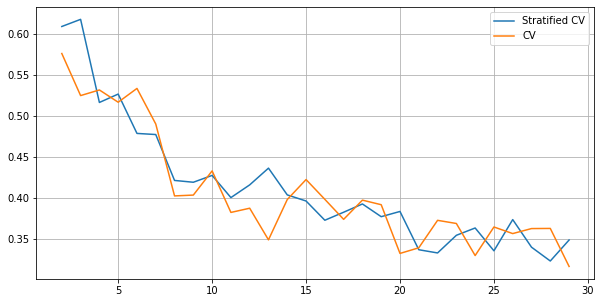

0.61 & 0.58 & \\
0.62 & 0.52 & \\
0.52 & 0.53 & \\
0.53 & 0.52 & \\
0.48 & 0.53 & \\
0.48 & 0.49 & \\
0.42 & 0.4 & \\
0.42 & 0.4 & \\
0.43 & 0.43 & \\
0.4 & 0.38 & \\
0.42 & 0.39 & \\
0.44 & 0.35 & \\
0.4 & 0.4 & \\
0.4 & 0.42 & \\
0.37 & 0.4 & \\
0.38 & 0.37 & \\
0.39 & 0.4 & \\
0.38 & 0.39 & \\
0.38 & 0.33 & \\
0.34 & 0.34 & \\
0.33 & 0.37 & \\
0.35 & 0.37 & \\
0.36 & 0.33 & \\
0.34 & 0.36 & \\
0.37 & 0.36 & \\
0.34 & 0.36 & \\
0.32 & 0.36 & \\
0.35 & 0.32 & \\


In [27]:
cv_research(glass,range(2,30))

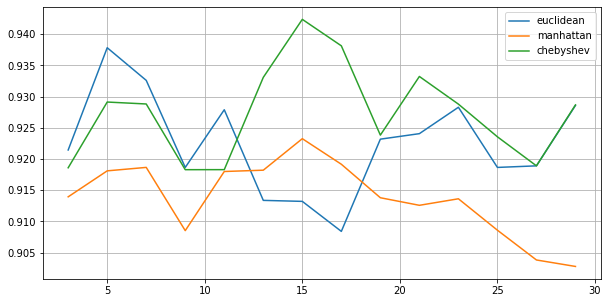

3.0 & 0.92 & 0.91 & 0.92 & \\
5.0 & 0.94 & 0.92 & 0.93 & \\
7.0 & 0.93 & 0.92 & 0.93 & \\
9.0 & 0.92 & 0.91 & 0.92 & \\
11.0 & 0.93 & 0.92 & 0.92 & \\
13.0 & 0.91 & 0.92 & 0.93 & \\
15.0 & 0.91 & 0.92 & 0.94 & \\
17.0 & 0.91 & 0.92 & 0.94 & \\
19.0 & 0.92 & 0.91 & 0.92 & \\
21.0 & 0.92 & 0.91 & 0.93 & \\
23.0 & 0.93 & 0.91 & 0.93 & \\
25.0 & 0.92 & 0.91 & 0.92 & \\
27.0 & 0.92 & 0.9 & 0.92 & \\
29.0 & 0.93 & 0.9 & 0.93 & \\


In [28]:
metrics_research(seeds,range(3,30,2))

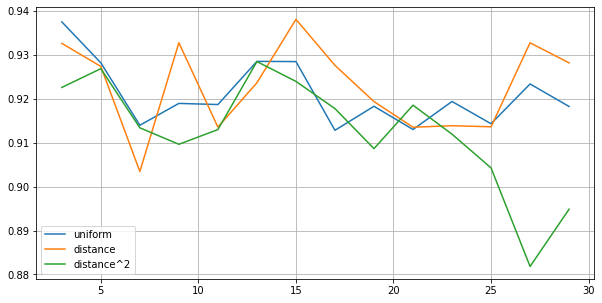

3.0 & 0.94 & 0.93 & 0.92 & \\
5.0 & 0.93 & 0.93 & 0.93 & \\
7.0 & 0.91 & 0.9 & 0.91 & \\
9.0 & 0.92 & 0.93 & 0.91 & \\
11.0 & 0.92 & 0.91 & 0.91 & \\
13.0 & 0.93 & 0.92 & 0.93 & \\
15.0 & 0.93 & 0.94 & 0.92 & \\
17.0 & 0.91 & 0.93 & 0.92 & \\
19.0 & 0.92 & 0.92 & 0.91 & \\
21.0 & 0.91 & 0.91 & 0.92 & \\
23.0 & 0.92 & 0.91 & 0.91 & \\
25.0 & 0.91 & 0.91 & 0.9 & \\
27.0 & 0.92 & 0.93 & 0.88 & \\
29.0 & 0.92 & 0.93 & 0.89 & \\


In [9]:
weights_research(seeds,range(3,30,2))

In [10]:
def final_test(data, metric, weights):
    k_range = range(3,30,2)
    plt.figure(figsize=(10,5))

    score = research(data, k_range, metric = metric, weights=weights)
    plt.plot(k_range,score)

    plt.grid()
    plt.show()
    print(max(score))

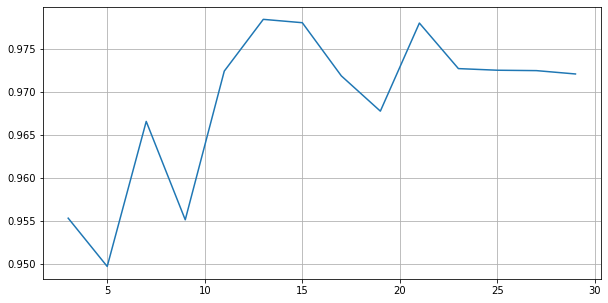

0.9784779850427027


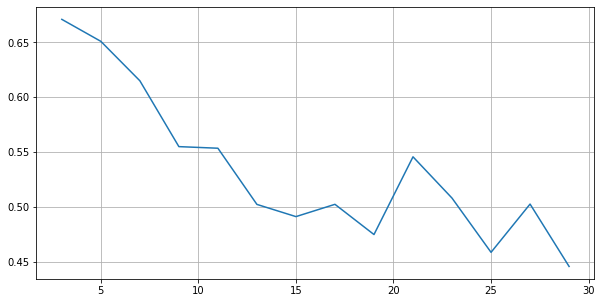

0.6709039513062501


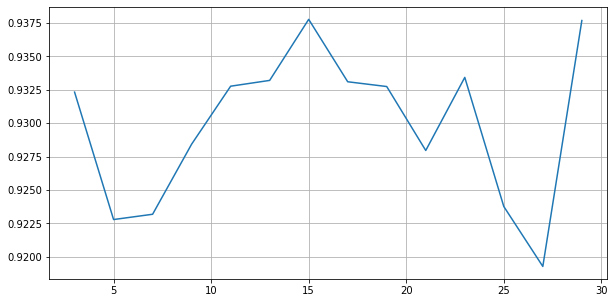

0.9377775345131667


In [43]:
final_test(wine,'euclidean','distance')
final_test(glass,'euclidean','distance')
final_test(seeds,'chebyshev','distance')